In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/champions-league-era-stats/PlayerAppearDetails.csv
/kaggle/input/champions-league-era-stats/AllTimeRankingByClub.csv
/kaggle/input/champions-league-era-stats/TopGoalScorer.csv
/kaggle/input/champions-league-era-stats/PlayerGoalTotals.csv
/kaggle/input/champions-league-era-stats/PlayerGoalDetails.csv
/kaggle/input/champions-league-era-stats/CoachesAppearTotals.csv
/kaggle/input/champions-league-era-stats/CoachesAppearDetails.csv
/kaggle/input/champions-league-era-stats/GoalStatsPerGroupRound.csv
/kaggle/input/champions-league-era-stats/AllTimeRankingByCountry.csv
/kaggle/input/champions-league-era-stats/PlayerAppearTotals.csv


In [2]:
PATH = "/kaggle/input/champions-league-era-stats"

# The country with the most clubs to participate in the Champions League
Lets analyze the AllTimeRankingByClub which is the more detailed file.  The All Time RankingByCountry is the summary file which removes the club names and just adds up  the numbers per country.

You can use this dictionary if you'd like to convert between the country code and country name:

In [3]:
country_dict = { "ESP": "Spain", "ENG": "England", "ITA" :"Italy", "GER":"Germany", "POR": "Portugal",
               "FRA":"France", "NED":"Netherlands", "POL":"Poland", "ROU":"Romania", "RUS":"Russia", 
               "AUT":"Austria", "SCO":"Scotland", "SRB":"Serbia", "SUI":"Switzerland", "SVK":"Slovakia",
               "SVN":"SLovenia", "TUR":"Turkey", "NOR":"Norway", "ISR":"Israel", "KAZ":"Kazakhstan", 
               "AZE":"Azerbaijan", "HUN":"Hungary", "GRE":"Greece", "FIN":"Finland", "DEN":"Denmark", 
                "SWE": "Swedend", "CZE":"Czech Republic", "CYP":"Cyprus", "CRO": "Croatia", "BUL":"Bulgaria", 
                "BLR":"Belarus", "BEL":"Belguim", "UKR":"Ukraine"}

In [4]:
AllTimeClub = pd.read_csv(os.path.join(PATH, "AllTimeRankingByClub.csv"), encoding='utf-16')
AllTimeClub.columns

Index(['Position', 'Club', 'Country', 'Participated', 'Titles', 'Played',
       'Win', 'Draw', 'Loss', 'Goals For', 'Goals Against', 'Pts',
       'Goal Diff'],
      dtype='object')

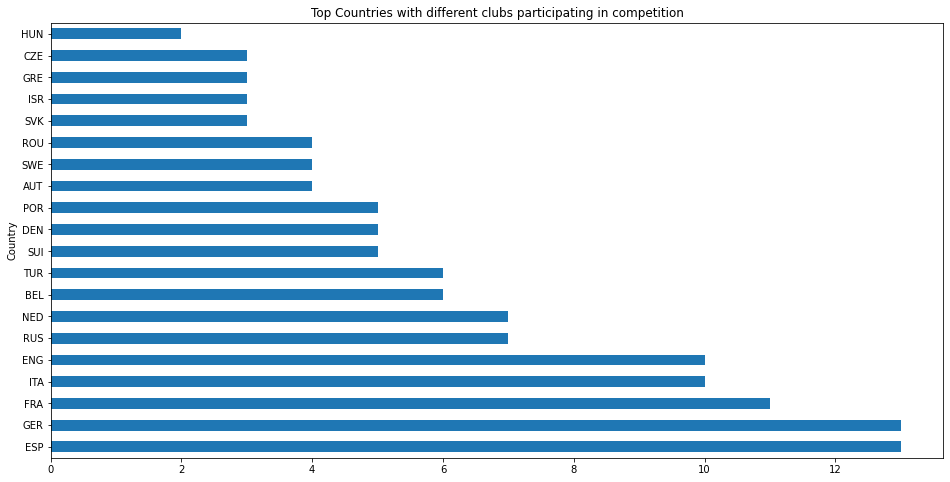

In [5]:
df = AllTimeClub.copy(deep=True)
plt.figure(figsize=(16,8))
plt.title("Top Countries with different clubs participating in competition")
df = df.groupby("Country")["Club"].count().sort_values(ascending=False)[:20].plot(kind='barh')

With the domination of the spanish clubs in the last decade I expected them to be in the top but the German clubs are a surprise for me. Even though both leagues have been dominated by a few clubs (2 in Spain and mostly 1 in Germany) it looks like overall the competition produces more balanced results for their clubs compared  other leagues by sending different clubs to Europe's top club competition

# Top scoring clubs per game in the competition

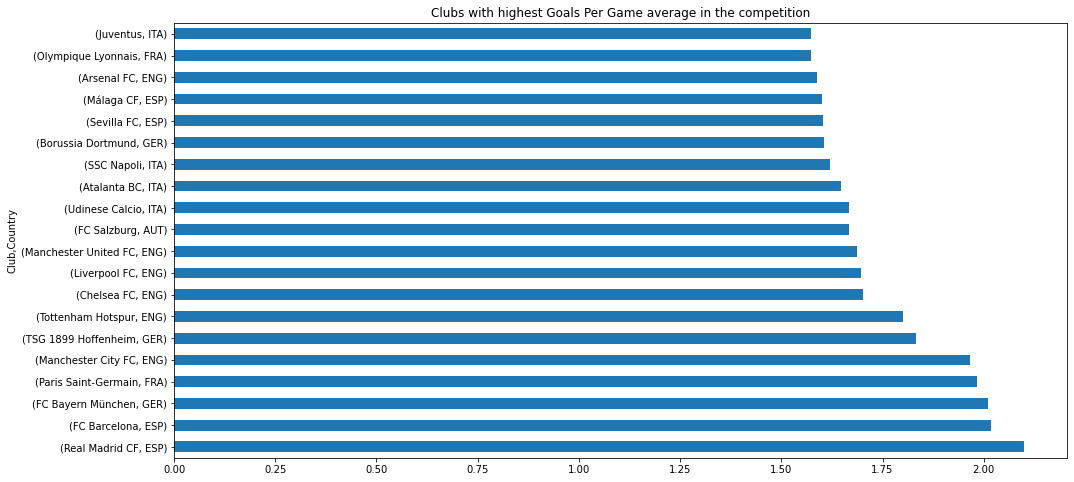

In [6]:
df = AllTimeClub.copy(deep=True)
df["GPG"] = df["Goals For"] / df["Played"]
plt.figure(figsize=(16,8))
plt.title("Clubs with highest Goals Per Game average in the competition")
df = df.groupby(["Club", "Country"])["GPG"].max().sort_values(ascending=False)[:20].plot(kind='barh')

This list has more surprising results than the country list.  PSG, Manchester City, Hoffenheim & Tottenham were not teams I was expecting to see so high in the list. Obviously the less games you participate in, while scoring many goals in those few games skews the results.  Lets confirm

So lets look at those clubs and how many games have they played or have participated in the competition.

In [7]:
df = AllTimeClub.copy(deep=True)
df["GPG"] = df["Goals For"] / df["Played"]
df = df.groupby("Club")["GPG"].max().sort_values(ascending=False)[:20]
AllTimeClub.loc[AllTimeClub["Club"].isin(df.index.tolist())]

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,25,7,279,165,54,60,586,307.0,384.0,279.0
1,2,FC Barcelona,ESP,25,4,265,156,63,46,535,265.0,375.0,270.0
2,3,FC Bayern München,GER,24,3,262,151,54,57,527,271.0,356.0,256.0
3,4,Manchester United FC,ENG,23,2,230,121,56,53,388,220.0,298.0,168.0
4,5,Juventus,ITA,21,1,206,104,52,50,324,203.0,260.0,121.0
5,6,Chelsea FC,ENG,17,2,177,89,50,38,301,162.0,228.0,139.0
7,8,Arsenal FC,ENG,19,0,177,83,41,53,281,205.0,207.0,76.0
9,10,Liverpool FC,ENG,13,2,132,65,34,33,224,128.0,164.0,96.0
10,11,Paris Saint-Germain,FRA,13,0,121,66,22,33,240,138.0,154.0,102.0
11,12,Olympique Lyonnais,FRA,16,0,136,58,36,42,214,165.0,152.0,49.0


We can see that at least 3 teams have only played once in the competition, while 3 others have participated 5 times or less.  There are many ways to slice and dice this dataset so please enjoy and share some of the interesting findings that you come up with.

In [8]:
del df

# Coach with the most appearances for a single club
We will analyze the CoachesAppearDetails file which has the details broken down by each club that the coach represented.  The CoachsAppearTotals is just the sum of this data without the club represented

In [9]:
CoachAppear = pd.read_csv(os.path.join(PATH, "CoachesAppearDetails.csv"), index_col='Unnamed: 0')
CoachAppear

,Coach,Club,Appearance
0,Sir Alex Ferguson,Manchester United FC,190
1,Arsène Wenger,Arsenal FC,171
2,Arsène Wenger,AS Monaco FC,7
3,Carlo Ancelotti,FC Bayern München,12
4,Carlo Ancelotti,Juventus,10
...,...,...,...
104,Thomas Schaaf,SV Werder Bremen,40
105,Unai Emery,Valencia CF,13
106,Unai Emery,Sevilla FC,6
107,Unai Emery,Paris Saint-Germain,16


Lets see who are the coaches with the most appearances with a single club and which club it was

In [10]:
df = CoachAppear.copy(deep=True)
df = df.groupby(["Coach", "Club"])["Appearance"].max().sort_values(ascending=False)[:10]
df

Coach                        Club                         
Sir Alex Ferguson            Manchester United FC             190
Arsène Wenger                Arsenal FC                       171
Diego Simeone                Club Atlético de Madrid           77
Ottmar Hitzfeld              FC Bayern München                 76
Marcello Lippi               Juventus                          76
Carlo Ancelotti              AC Milan                          73
Mircea Lucescu               FC Shakhtar Donetsk               68
Rafael Benítez               Liverpool FC                      62
Vicente del Bosque           Real Madrid CF                    60
Javier Iruretagoyena Amiano  Real Club Deportivo La Coruña     58
Name: Appearance, dtype: int64

# Coach that represented the most clubs in the competition
And now lets looks at which coach has coached the most clubs in the competition, I expected Ancelotti to be up there but I didn't know that Koeman has coached so many diffeernt clubs, need to brush up on my CL history :)

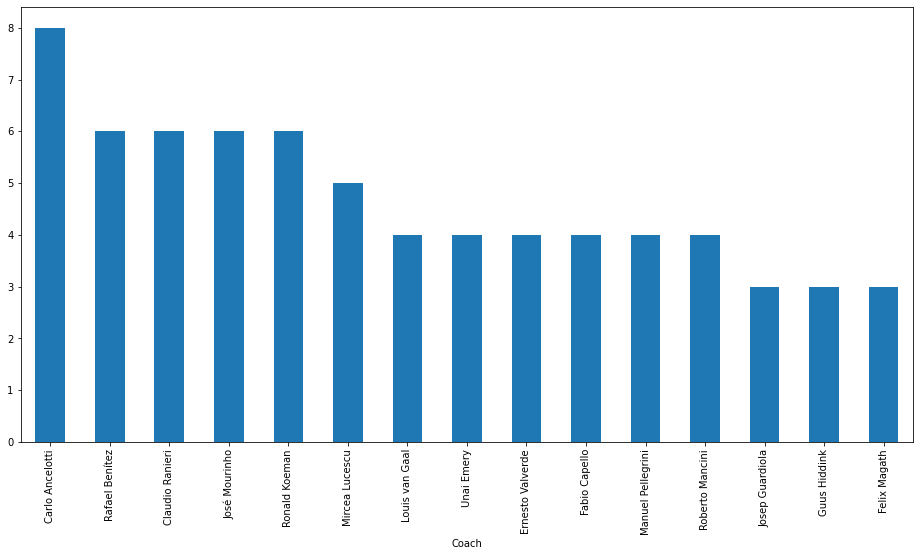

In [11]:
df = CoachAppear.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Coach"])["Club"].count().sort_values(ascending=False)[:15].plot(kind='bar')

In [12]:
del df

# Analyzing the Player appearances
This dataset looks very similar to the coaches data so lets repeat the same analysis.  The player that played the most games for a single club (Note: this player could play for multiple clubs but this is the most games for a club) is:

In [13]:
PlayerAppear = pd.read_csv(os.path.join(PATH, "PlayerAppearDetails.csv"), index_col='Unnamed: 0')
PlayerAppear

,Player,Club,Appearances
0,Iker Casillas,Real Madrid CF,150
1,Iker Casillas,FC Porto,27
2,Cristiano Ronaldo,Manchester United FC,52
3,Cristiano Ronaldo,Real Madrid CF,101
4,Cristiano Ronaldo,Juventus,23
...,...,...,...
656,Philippe Mexès,AS Roma,31
657,Philippe Mexès,AC Milan,17
658,James Rodríguez,FC Porto,14
659,James Rodríguez,FC Bayern München,17


In [14]:
df = PlayerAppear.copy(deep=True)
df = df.groupby(["Player", "Club"])["Appearances"].max().sort_values(ascending=False)[:15]
df

Player             Club                    
Marcelo            Real Madrid CF              99
Manuel Neuer       FC Bayern München           97
Javier Zanetti     FC Internazionale Milano    97
Guti               Real Madrid CF              97
Petr Čech          Chelsea FC                  94
David Alaba        FC Bayern München           91
David Trezeguet    AS Monaco FC                 9
Martín Demichelis  Málaga CF                    9
Julian Draxler     VfL Wolfsburg                9
Claude Makelele    FC Nantes                    9
Dimitar Berbatov   AS Monaco FC                 9
Mark van Bommel    FC Barcelona                 9
Claudio Pizarro    SV Werder Bremen             9
Gareth Bale        Tottenham Hotspur            9
Samuel Eto’o       Chelsea FC                   9
Name: Appearances, dtype: object

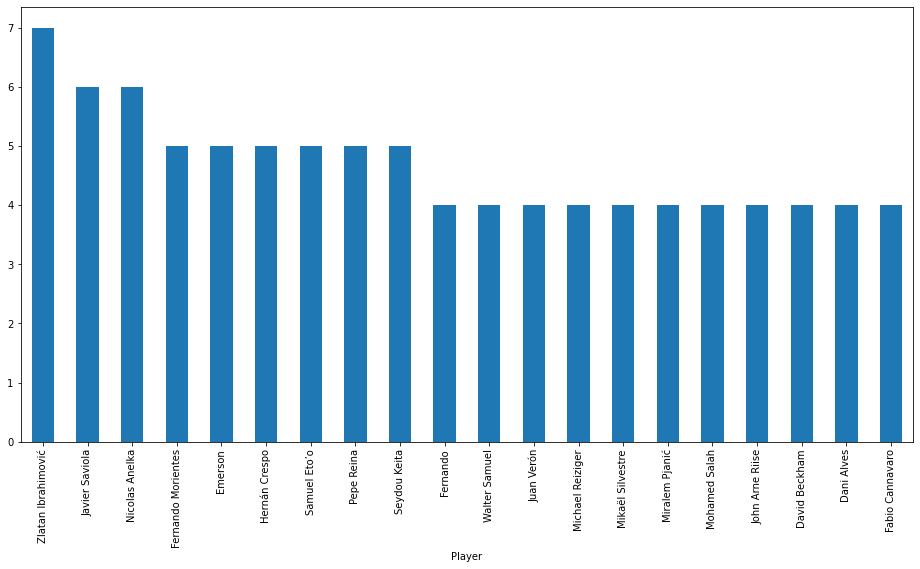

In [15]:
df = PlayerAppear.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Player"])["Club"].count().sort_values(ascending=False)[:20].plot(kind='bar')

# Analyzing the top goal scorers
Lets see which player scored the most goals for a single club by using the PlayerGoalDetails file.  The PlayerGoalTotals is just a summary of this data without the club information.

In [16]:
PlayerGoals = pd.read_csv(os.path.join(PATH, "PlayerGoalDetails.csv"), index_col='Unnamed: 0')
PlayerGoals.head(10)

,Player,Club,Goals
0,Cristiano Ronaldo,Manchester United FC,15
1,Cristiano Ronaldo,Real Madrid CF,105
2,Cristiano Ronaldo,Juventus,14
3,Lionel Messi,FC Barcelona,120
4,Robert Lewandowski,Borussia Dortmund,17
5,Robert Lewandowski,FC Bayern München,56
6,Karim Benzema,Olympique Lyonnais,12
7,Karim Benzema,Real Madrid CF,59
8,Raúl González,Real Madrid CF,66
9,Raúl González,FC Schalke 04,5


In [17]:
df = PlayerGoals.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Player", "Club"])["Goals"].max().sort_values(ascending=False)[:25]
df

Player                Club                
Lionel Messi          FC Barcelona            120
Cristiano Ronaldo     Real Madrid CF          105
Raúl González         Real Madrid CF           66
Karim Benzema         Real Madrid CF           59
Robert Lewandowski    FC Bayern München        56
Thomas Müller         FC Bayern München        48
Alessandro Del Piero  Juventus                 42
Sergio Agüero         Manchester City FC       36
Didier Drogba         Chelsea FC               36
Ruud van Nistelrooy   Manchester United FC     35
Thierry Henry         Arsenal FC               35
Edinson Cavani        Paris Saint-Germain      30
Wayne Rooney          Manchester United FC     30
Filippo Inzaghi       AC Milan                 29
Andriy Shevchenko     AC Milan                 29
Ryan Giggs            Manchester United FC     28
David Trezeguet       Juventus                 25
Arjen Robben          FC Bayern München        25
Kaká                  AC Milan                 25
Mohamed

<Figure size 1152x576 with 0 Axes>

Once again lets look at which player scored the most goals for different clubs

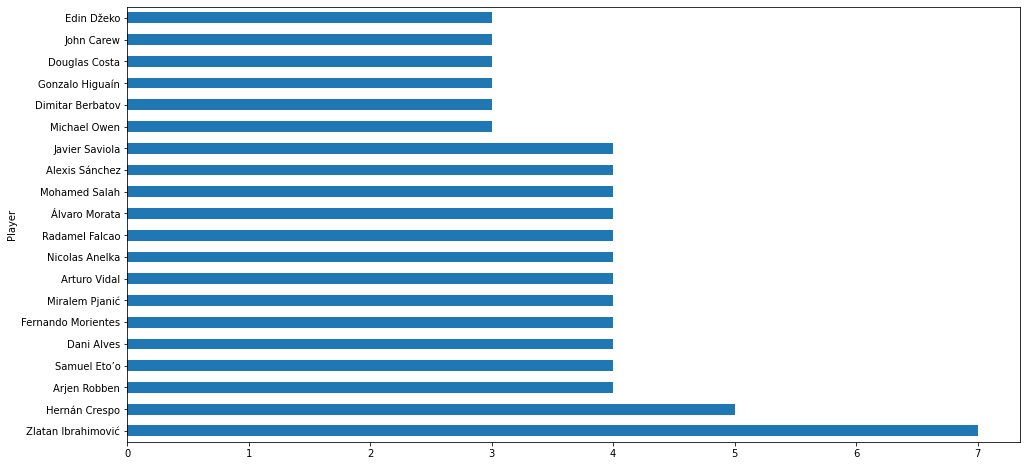

In [18]:
df = PlayerGoals.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby("Player")["Club"].count().sort_values(ascending=False)[:20].plot(kind='barh')